In [1]:
import numpy as np
import pandas as pd

data visualization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

**Influential points** 

In [3]:
from scipy import stats

**Bartlett's sphericity test**

In [4]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

**PCA**

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**TEST OF ASSUMPTIONS**

In [6]:
import statsmodels.api as sm
#!

#2

#3 VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
#DW Test
from statsmodels.stats.stattools import durbin_watson

Linear Regression
Testing and training data

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import glm

weights = weights of stockpicking concept
' Large B/P ', ' Large ROE ', ' Large S/P ',' Large Return Rate in the last quarter ', ' Large Market Value ',' Small systematic Risk'
outputs = The normalized investment performance indicator 
'Annual Return.1', 'Excess Return.1','Systematic Risk.1', 'Total Risk.1', 'Abs. Win Rate.1','Rel. Win Rate.1'

In [8]:
csvFile = "stock portfolio performance data set.xlsx"

In [9]:
df = pd.read_excel(csvFile,"all period",skiprows=[0],usecols = [1,2,3,4,5,6,7,8,9,10,11,12])

In [10]:
df.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
0,1.0,0.0,0.0,0.0,0.0,0.0,0.139,0.010,1.33,0.149,0.663,0.525
1,0.0,1.0,0.0,0.0,0.0,0.0,0.143,0.010,1.17,0.108,0.663,0.650
2,0.0,0.0,1.0,0.0,0.0,0.0,0.173,0.018,1.30,0.144,0.638,0.513
3,0.0,0.0,0.0,1.0,0.0,0.0,0.096,-0.002,1.39,0.144,0.613,0.475
4,0.0,0.0,0.0,0.0,1.0,0.0,0.096,0.001,1.04,0.087,0.725,0.538


In [11]:
df.columns

Index([' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk', 'Annual Return', 'Excess Return',
       'Systematic Risk', 'Total Risk', 'Abs. Win Rate', 'Rel. Win Rate'],
      dtype='object')

In [12]:
weights = df.columns[:6]
print(weights)

Index([' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk'],
      dtype='object')


In [13]:
outputs = df.columns[-6:]
print(outputs)

Index(['Annual Return', 'Excess Return', 'Systematic Risk', 'Total Risk',
       'Abs. Win Rate', 'Rel. Win Rate'],
      dtype='object')


Outputs

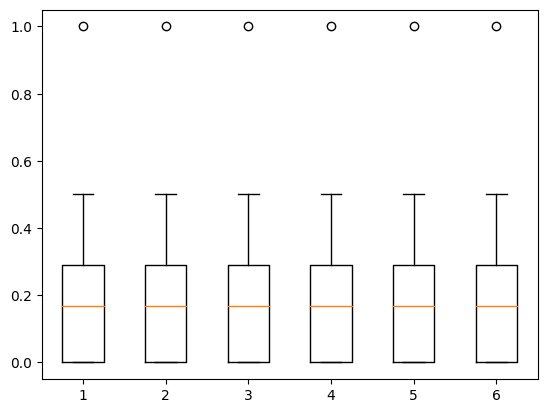

In [14]:
plt.boxplot(df.iloc[:,:6])
plt.show()

weigths

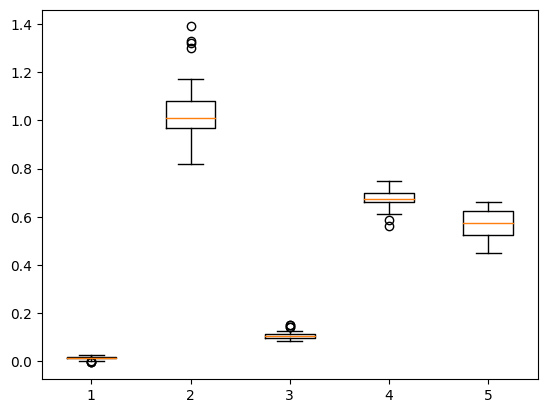

In [15]:
plt.boxplot(df.iloc[:,7:])
plt.show()

Removing influential points



In [16]:
df.shape

(63, 12)

**Menthod1** : Z Score

In [17]:
z_scores = np.abs(stats.zscore(df))
threshold = 3
df_clean = df[(z_scores < threshold).all(axis=1)]
df_clean.shape


(56, 12)

In [18]:
df[~(z_scores < threshold).all(axis=1)]

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
0,1.0,0.0,0.0,0.0,0.0,0.0,0.139,0.010,1.33,0.149,0.663,0.525
1,0.0,1.0,0.0,0.0,0.0,0.0,0.143,0.010,1.17,0.108,0.663,0.650
2,0.0,0.0,1.0,0.0,0.0,0.0,0.173,0.018,1.30,0.144,0.638,0.513
3,0.0,0.0,0.0,1.0,0.0,0.0,0.096,-0.002,1.39,0.144,0.613,0.475
4,0.0,0.0,0.0,0.0,1.0,0.0,0.096,0.001,1.04,0.087,0.725,0.538
5,0.0,0.0,0.0,0.0,0.0,1.0,0.070,-0.005,1.10,0.110,0.563,0.463
7,0.5,0.0,0.5,0.0,0.0,0.0,0.164,0.016,1.32,0.149,0.650,0.513


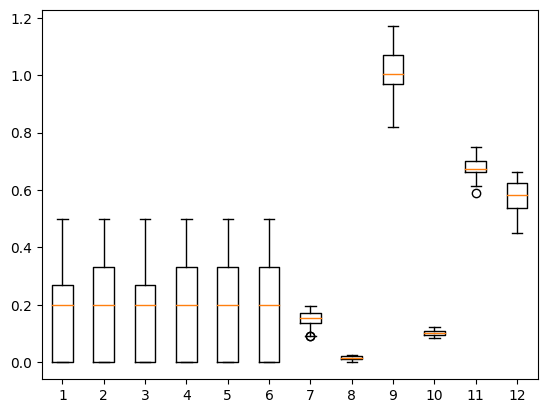

In [19]:
plt.boxplot(df_clean)
plt.show()

**Method 2** : IQR

In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clean.shape


(54, 12)

In [21]:
df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
0,1.0,0.0,0.0,0.000,0.000,0.000,0.139,0.010,1.33,0.149,0.663,0.525
1,0.0,1.0,0.0,0.000,0.000,0.000,0.143,0.010,1.17,0.108,0.663,0.650
2,0.0,0.0,1.0,0.000,0.000,0.000,0.173,0.018,1.30,0.144,0.638,0.513
3,0.0,0.0,0.0,1.000,0.000,0.000,0.096,-0.002,1.39,0.144,0.613,0.475
4,0.0,0.0,0.0,0.000,1.000,0.000,0.096,0.001,1.04,0.087,0.725,0.538
5,0.0,0.0,0.0,0.000,0.000,1.000,0.070,-0.005,1.10,0.110,0.563,0.463
7,0.5,0.0,0.5,0.000,0.000,0.000,0.164,0.016,1.32,0.149,0.650,0.513
15,0.0,0.0,0.0,0.500,0.500,0.000,0.090,-0.001,1.15,0.109,0.663,0.500
40,0.0,0.0,0.0,0.333,0.333,0.333,0.090,0.000,1.13,0.113,0.588,0.450


After removal of outlyers

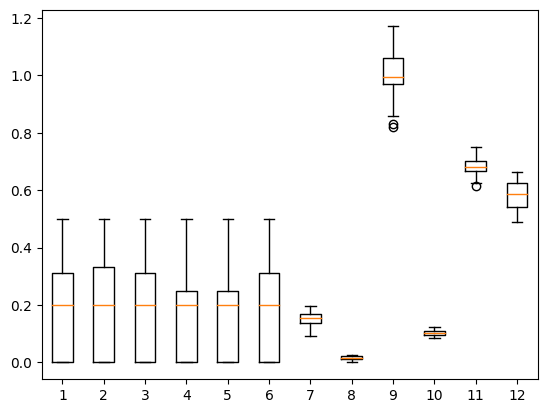

In [22]:
plt.boxplot(df_clean)
plt.show()

In [23]:
# df_clean = df

In [24]:
weight_df = df_clean.iloc[:,:6].copy()
outputs_df = df_clean.iloc[:,-6:].copy()

In [25]:
weight_df

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk
6,0.500,0.500,0.000,0.000,0.000,0.000
8,0.000,0.500,0.500,0.000,0.000,0.000
9,0.500,0.000,0.000,0.500,0.000,0.000
10,0.000,0.500,0.000,0.500,0.000,0.000
11,0.000,0.000,0.500,0.500,0.000,0.000
12,0.500,0.000,0.000,0.000,0.500,0.000
13,0.000,0.500,0.000,0.000,0.500,0.000
14,0.000,0.000,0.500,0.000,0.500,0.000
16,0.500,0.000,0.000,0.000,0.000,0.500
17,0.000,0.500,0.000,0.000,0.000,0.500


In [26]:
outputs_df

,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
6,0.195,0.026,0.97,0.105,0.738,0.638
8,0.185,0.022,1.06,0.109,0.675,0.650
9,0.150,0.015,1.05,0.113,0.700,0.513
10,0.159,0.015,1.17,0.115,0.675,0.638
11,0.170,0.018,1.16,0.123,0.688,0.563
12,0.140,0.011,1.09,0.107,0.700,0.575
13,0.123,0.008,1.01,0.088,0.650,0.663
14,0.145,0.013,1.07,0.103,0.700,0.563
16,0.118,0.009,0.97,0.109,0.688,0.500
17,0.154,0.017,0.99,0.101,0.675,0.625


comparision of dataset before and after removing influential points

In [27]:
# df.shape

In [28]:
# df.describe()

In [29]:
# df_clean.describe()

In [30]:
# df_clean.describe()

Corelation matrix

In [31]:
corr_matrix = weight_df.corr()
corr_matrix

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk
Large B/P,1.000000,-0.217003,-0.336726,-0.127976,-0.127976,-0.179812
Large ROE,-0.217003,1.000000,-0.217003,-0.178123,-0.178123,-0.230127
Large S/P,-0.336726,-0.217003,1.000000,-0.127976,-0.127976,-0.179812
Large Return Rate in the last quarter,-0.127976,-0.178123,-0.127976,1.000000,-0.338537,-0.216121
Large Market Value,-0.127976,-0.178123,-0.127976,-0.338537,1.000000,-0.216121
Small systematic Risk,-0.179812,-0.230127,-0.179812,-0.216121,-0.216121,1.000000


using seaborn

<Axes: >

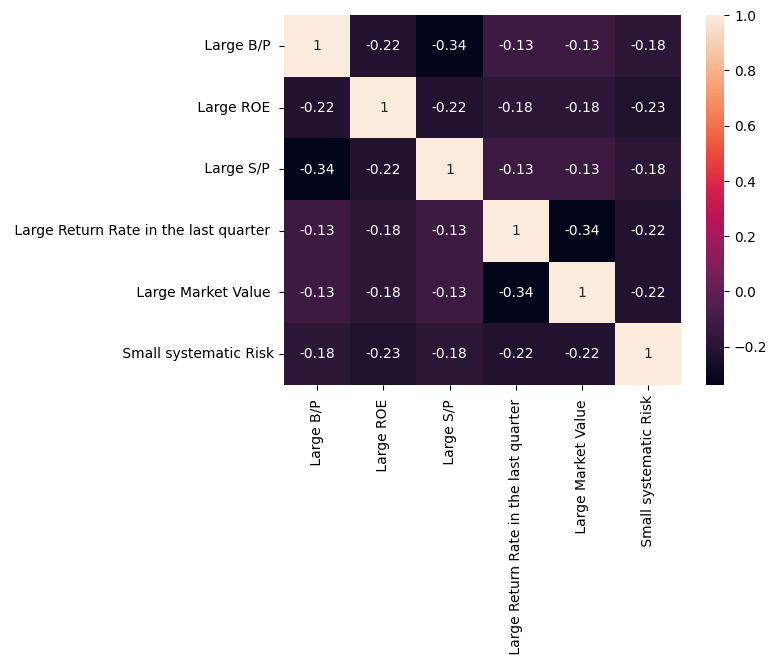

In [32]:
sns.heatmap(corr_matrix, annot=True)

using matlplotlib

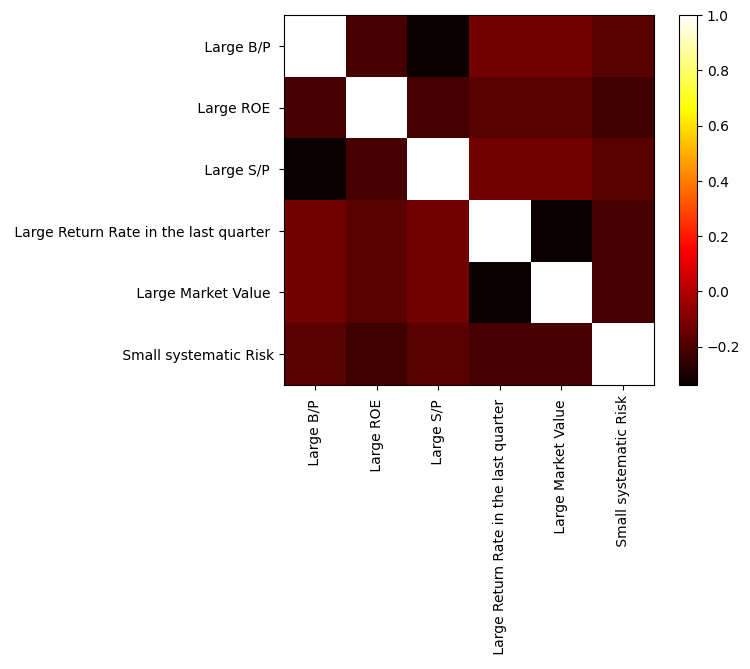

In [33]:
plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

Bartlett's sphericity test

In [34]:
# Perform Bartlett's sphericity test
chi_square_value, p_value = calculate_bartlett_sphericity(weight_df)

# Print the test results
print('Bartlett Sphericity Test:')
print("Chi-square value:", chi_square_value)
print("P-value:", p_value)


Bartlett Sphericity Test:
Chi-square value: 615.8152602631158
P-value: 1.5461469300934523e-121


p<0.5 : do PCA 

In [35]:
# standardize the data
pca_stand = StandardScaler().fit_transform(weight_df)
pca_stand.shape

(54, 6)

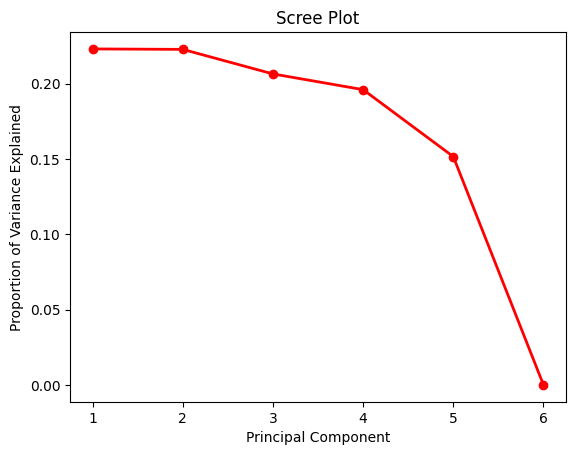

In [36]:
# Fit PCA model and transform the data
pca = PCA()
pca.fit(pca_stand)
# Generate scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [37]:
# perform PCA
pca = PCA(n_components=5)
principal_components = pca.fit_transform(weight_df)

# create a new DataFrame with the principal components
pca_df = pd.DataFrame(data = principal_components)

# print the explained variance ratio of each principal component
print((pca.explained_variance_ratio_ * 100).sum())


99.9999672150788


In [38]:
eigenVectors = pca.components_
print(eigenVectors)

[[ 0.00000000e+00  2.14105083e-14 -3.50509505e-15  7.07106781e-01
  -7.07106781e-01 -2.25913354e-14]
 [-7.07106781e-01  3.10862447e-15  7.07106781e-01  1.22124533e-15
  -2.30371278e-15 -1.13797860e-15]
 [ 6.50859272e-02 -6.91091224e-01  6.50859272e-02 -7.40972920e-02
  -7.40972920e-02  7.09182449e-01]
 [-2.93953744e-01  5.87386369e-01 -2.93953744e-01 -2.83270537e-01
  -2.83270537e-01  5.67164219e-01]
 [ 4.92594546e-01  1.03447123e-01  4.92594546e-01 -4.97614470e-01
  -4.97614470e-01 -9.35927221e-02]]


In [39]:
(pca.explained_variance_ratio_ * 100).sum()


99.9999672150788

In [40]:
pca_df

,0,1,2,3,4
0,1.084276e-14,-3.535534e-01,-0.309722,0.136013,0.291246
1,9.192313e-15,3.535534e-01,-0.309722,0.136013,0.291246
2,3.535534e-01,-3.535534e-01,-0.001225,-0.299316,-0.009285
3,3.535534e-01,2.182682e-15,-0.379314,0.141354,-0.203858
4,3.535534e-01,3.535534e-01,-0.001225,-0.299316,-0.009285
5,-3.535534e-01,-3.535534e-01,-0.001225,-0.299316,-0.009285
6,-3.535534e-01,4.033263e-16,-0.379314,0.141354,-0.203858
7,-3.535534e-01,3.535534e-01,-0.001225,-0.299316,-0.009285
8,-1.162935e-14,-3.535534e-01,0.390415,0.125902,0.192726
9,-6.412533e-16,9.950853e-16,0.012326,0.566572,-0.001848


Test of assumptions

1.Homoscedasticity

2.Normality

**QQ plot**

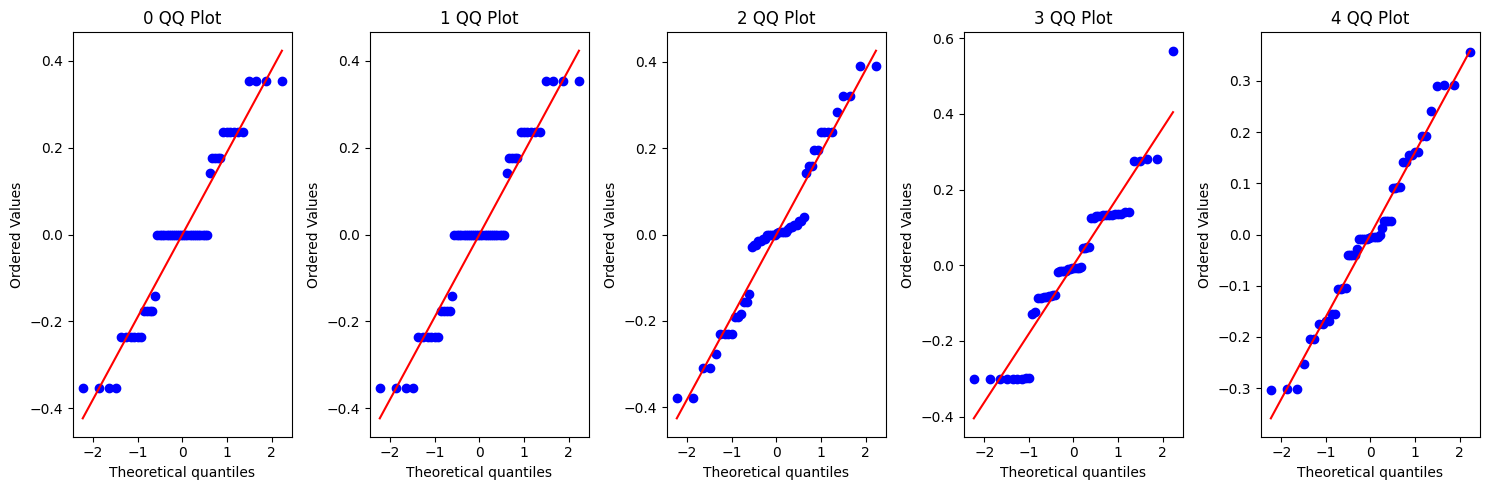

In [41]:
import scipy.stats as stats

# create a figure with 5 subplots
fig, axs = plt.subplots(ncols=5, figsize=(15, 5))

# plot each QQ plot using Matplotlib
for i, col in enumerate(pca_df.columns):
    stats.probplot(pca_df[col], dist="norm", plot=axs[i])
    axs[i].set_title(f'{col} QQ Plot')

plt.tight_layout()
plt.show()


3.Multi Colinearity

**VIF**

In [42]:
# extract predictor variables and target variable
X = weight_df
y = outputs_df

# add a constant to the predictor variables
X = sm.add_constant(X)

# fit a linear regression model
model = sm.OLS(y, X).fit()

# calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Predictor"] = X.columns

# display the VIF table
print(vif)


     VIF Factor                                Predictor
0  3.070641e+06                                    const
1  8.325152e+04                               Large B/P 
2  8.771456e+04                               Large ROE 
3  8.325152e+04                               Large S/P 
4  8.310974e+04   Large Return Rate in the last quarter 
5  8.310974e+04                      Large Market Value 
6  8.792988e+04                    Small systematic Risk


4.Auto Corelation

**DW test**

In [43]:
# import statsmodels.api as sm

# # loop through each column and calculate the DW test statistic
# for col in pca_df.columns:
#     X = pca_df[col]
#     X = sm.add_constant(X)
#     model = sm.OLS(pca_df['PC1'], X).fit()
#     print(f"{col}: DW test statistic = {sm.stats.stattools.durbin_watson(model.resid)}")


In [44]:
dw_results = []
for col in pca_df.columns:
    dw_statistic = durbin_watson(pca_df[col])
    dw_results.append(dw_statistic)

for i, col in enumerate(pca_df.columns):
    print(f"DW statistic for {col}: {dw_results[i]}")


DW statistic for 0: 1.4031280589403141
DW statistic for 1: 2.7949767149755513
DW statistic for 2: 1.5156579990068377
DW statistic for 3: 2.0569198370480075
DW statistic for 4: 1.5096928613601888


**MODEL**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, outputs_df.iloc[:,0], test_size=0.2, random_state=22)

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model on the testing data
y_predict = model.predict(X_test)
score = model.score(X_test, y_test)
# print the R^2 score
print('R^2 score:', score)


R^2 score: 0.8140088985591405


In [47]:
# for i in range(5):
#     plt.scatter(y_test.iloc[:, i], y_predict[:, i])
#     plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'k--', lw=4)
#     plt.xlabel('Actual')
#     plt.ylabel('Predicted')
#     plt.title(f"Output {i+1}")
#     plt.show()